In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
#reflection
Base = automap_base()
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(recent.date)

2017-08-23


Most recent date in the data set: 2017-08-23

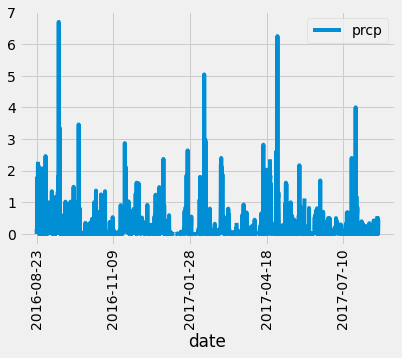

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

#select only date and prcp
engine.execute('SELECT date, prcp FROM Measurement').fetchall()

# Calculate the date one year from the last date in data set.
twelve_months_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= twelve_months_ago).\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip).set_index('date')

# Sort the dataframe by date
sorted_precip = precip_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
sorted_precip.plot.line(y='prcp')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
n_stations = session.query(Station.name).count()
n_stations

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active = session.query(Measurement.station, func.count(Measurement.station), Measurement.prcp).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772, 0.15),
 ('USC00519397', 2724, 0.08),
 ('USC00513117', 2709, 0.28),
 ('USC00519523', 2669, 0.15),
 ('USC00516128', 2612, 0.14),
 ('USC00514830', 2202, 0.01),
 ('USC00511918', 1979, 0.05),
 ('USC00517948', 1372, None),
 ('USC00518838', 511, 0.21)]

Most active station is station USC00519281

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(func.max(Measurement.tobs)).filter_by(station="USC00519281")



#session.query(func.min(one_station.tobs), func.max(one_station.tobs), func.avg(one_station.tobs)).all()

SELECT max(measurement.tobs) AS max_1 
FROM measurement 
WHERE measurement.station = ?


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()